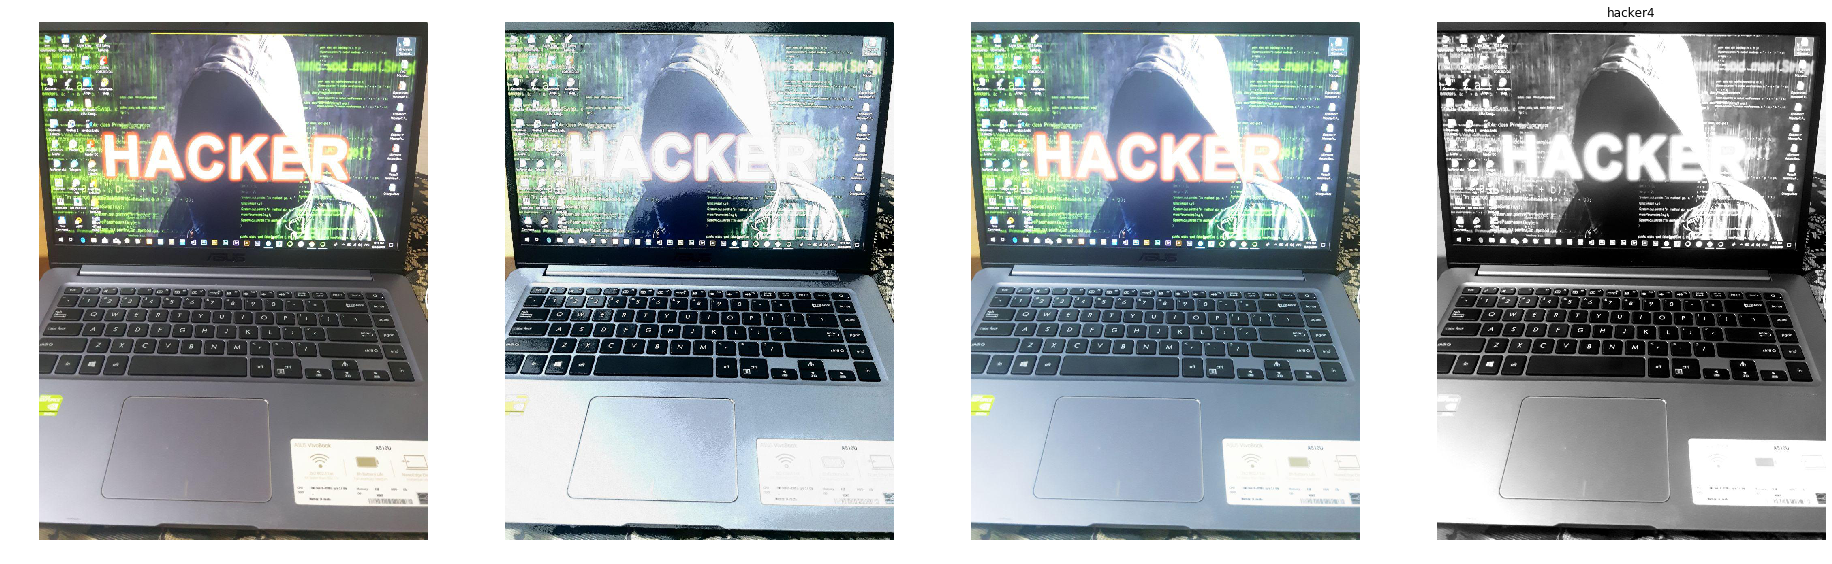

In [3]:
#special image
from PIL import Image
from pylab import *
import cv2
#special original images
image1 = array(Image.open('data/hacker1.jpg'))
image2 = array(Image.open('data/hacker2.jpg'))
image3 = array(Image.open('data/hacker3.jpg'))
image4 = array(Image.open('data/hacker4.jpg'))             
fig, axs = subplots(1, 4, figsize=(32, 32))
axs[0].imshow(image1)
axs[0].axis('off')
axs[1].imshow(image2)
axs[1].axis('off')
axs[2].imshow(image3)
axs[2].axis('off')
axs[3].imshow(image4)
axs[3].axis('off')
title("hacker4")
show()


In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Loading images 
files = ["data/hacker1.jpg", 
         "data/hacker2.jpg", 
         "data/hacker3.jpg", 
         "data/hacker4.jpg"] 
images = list([cv2.imread(f) for f in files])
# Compute the exposure times in seconds
exposure_times  = np.array([ 1/30.0, 0.24, 2.5, 14.0 ], dtype=np.float32)

In [14]:
# Compute the correct curve
print("Calculating Camera images of the correct Function (CRF) ... ")
calibrateDebevec = cv2.createCalibrateDebevec()
responseDebevec = calibrateDebevec.process(images, exposure_times)

Calculating Camera images of the correct Function (CRF) ... 


Merging images into one HDR image


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


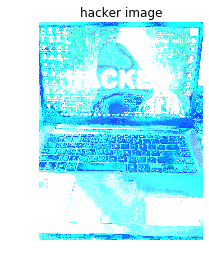

In [16]:
# Merge images into an HDR linear image
print("Merging images into one HDR image")
mergeDebevec = cv2.createMergeDebevec()
hdrDebevec = mergeDebevec.process(images, exposure_times, responseDebevec)
cv2.imwrite("hdrDebevec.jpg", hdrDebevec)
plt.imshow(hdrDebevec)
plt.axis('off')
plt.title("hacker image")
plt.show()

In [19]:
#Plotting Histogram
def histeq(hdrDebevec,nbr_bins=256):
    """ Histogram equalization of a grayscale image. """
    # get image histogram
    imhist,bins = histogram(hdrDebevec.flatten(),nbr_bins,normed=True)
    cdf = imhist.cumsum() # cumulative distribution function
    cdf = 254 * cdf / cdf[-1] # normalize
    # use linear interpolation of cdf to find new pixel values
    im2 = interp(hdrDebevec.flatten(),bins[:-1],cdf)
    return im2.reshape(hdrDebevec.shape), cdf

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """


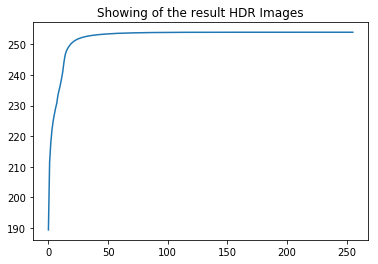

In [22]:
im2,cdf = histeq(hdrDebevec)
figure()
plot(cdf)
title("Showing of the result HDR Images")
show()

Tonemaping using Drago's method ... 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


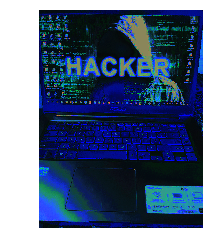

In [33]:
# Tonemap using Drago's method to obtain 24-bit color images
print("Tonemaping using Drago's method ... ")
tonemapDrago = cv2.createTonemapDrago(1.0, 0.8)
ldrDrago = tonemapDrago.process(hdrDebevec)
ldrDrago = 3 * ldrDrago
plt.imshow(ldrDrago)
plt.axis('off')
plt.show()

In [37]:
# Tonemap use Durand's method obtain 24-bit color image
print("Tonemaping use Durand's method ... ")
tonemapDurand = cv2.createTonemapDurand(1.6,4,1.0,1,1)
ldrDurand = tonemapDurand.process(hdrDebevec)
ldrDurand = 3 * ldrDurand
cv2.imwrite("ldr-Durand.jpg", ldrDurand * 255)
plt.imshow(ldrDurand)
plt.axis('off')
plt.show()

Tonemaping use Durand's method ... 


AttributeError: module 'cv2.cv2' has no attribute 'createTonemapDurand'

Tonemaping use Reinhard's method ... 


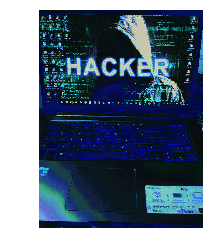

In [40]:
# Tonemap use Reinhard's method to obtain 24-bit color image
print("Tonemaping use Reinhard's method ... ")
tonemapReinhard = cv2.createTonemapReinhard(1.6, 0,0,0)
ldrReinhard = tonemapReinhard.process(hdrDebevec)
cv2.imwrite("ldr-Reinhard.jpg", ldrReinhard * 256)
plt.imshow(ldrReinhard)
plt.axis('off')
plt.show()

Tonemaping using Mantiuk's method ... 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


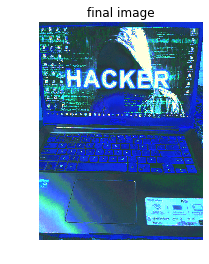

In [62]:
# Tonemap use Mantiuk's method to obtain 24-bit color image
print("Tonemaping using Mantiuk's method ... ")
tonemapMantiuk = cv2.createTonemapMantiuk(2.2,0.85, 1.1)
ldrMantiuk = tonemapMantiuk.process(hdrDebevec)
ldrMantiuk = 4 * ldrMantiuk
cv2.imwrite("ldr-hacker.jpg", ldrMantiuk * 258)
plt.imshow(ldrMantiuk)
plt.axis('off')
plt.title("final image")
plt.show()